In [132]:
!pip install category_encoders

In [133]:
# Importa a biblioteca pandas, usada para manipula√ß√£o e an√°lise de dados.
import pandas as pd

# Importa a biblioteca numpy, usada para manipula√ß√£o de arrays e opera√ß√µes num√©ricas.
import numpy as np

# Importa a biblioteca pyplot do matplotlib, usada para criar gr√°ficos.
from matplotlib import pyplot as plt

# Importa a biblioteca seaborn, que √© uma extens√£o do matplotlib para criar gr√°ficos mais atraentes e informativos.
import seaborn as sns

# Importando a biblioteca math para fun√ß√µes matem√°ticas.
import math

# Importa a fun√ß√£o train_test_split para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

# Importa a biblioteca preprocessing para utilizar o MinMaxScaler e StandardScaler, usados para normaliza√ß√£o e padroniza√ß√£o de dados.
from sklearn.preprocessing import StandardScaler

# Importa o category_encoders, que fornece v√°rias t√©cnicas para codifica√ß√£o de vari√°veis categ√≥ricas.
import category_encoders as ce

# Importa a biblioteca Pipeline para construir fluxos de trabalho de machine learning com pr√©-processamento e modelos.
from sklearn.pipeline import Pipeline

# Importa a classe LogisticRegression para aplicar a regress√£o log√≠stica.
from sklearn.linear_model import LogisticRegression

# Importa a classe RandomForestClassifier para aplicar a classifica√ß√£o usando Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importa a classe DecisionTreeClassifier para aplicar a classifica√ß√£o usando √°rvore de decis√£o.
from sklearn.tree import DecisionTreeClassifier

# Importa as m√©tricas roc_auc_score, confusion_matrix e classification_report para avaliar o desempenho do modelo.
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


# Importa o GridSearchCV para realizar a busca em grade de hiperpar√¢metros para o modelo.
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importa a biblioteca _pickle para serializa√ß√£o e desserializa√ß√£o de objetos.
import _pickle as cPickle

# Importa joblib, usado para salvar e carregar modelos de forma eficiente.
import joblib

# Importa a biblioteca de warnings para controlar a exibi√ß√£o de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apare√ßam no terminal durante a execu√ß√£o do c√≥digo.
warnings.filterwarnings("ignore")

# Configura√ß√µes do pandas para melhor visualiza√ß√£o dos dados:

# Exibe todo o conte√∫do da c√©lula, sem truncamento.
pd.set_option('display.max_colwidth', None)

# Evita que quebre a linha automaticamente ao exibir dataframes grandes.
pd.set_option('display.expand_frame_repr', False)

# Aumenta a largura do display para acomodar mais informa√ß√µes.
pd.set_option('display.width', 300)


In [134]:
import pandas as pd

# Dicion√°rio com informa√ß√µes das vari√°veis
dictionary = {
    "fraud_bool": ("Indicador de fraude na solicita√ß√£o de abertura de conta.", "0: Leg√≠tima, 1: Fraudulenta"),
    "income": ("Renda declarada do cliente.", "Valor num√©rico representando a renda."),
    "name_email_similarity": ("Similaridade entre o nome e o e-mail fornecido.", "Valor entre 0 e 1."),
    "prev_address_months_count": ("N√∫mero de meses no endere√ßo anterior.", "Valor num√©rico."),
    "current_address_months_count": ("N√∫mero de meses no endere√ßo atual.", "Valor num√©rico."),
    "customer_age": ("Idade do cliente.", "Valor num√©rico."),
    "days_since_request": ("Dias desde a solicita√ß√£o de abertura de conta.", "Valor num√©rico."),
    "payment_type": ("Tipo de m√©todo de pagamento utilizado.", "Exemplos: AA, AB, etc."),
    "zip_count_4w": ("N√∫mero de vezes que o CEP foi usado nas √∫ltimas 4 semanas.", "Valor num√©rico."),
    "velocity_6h": ("Velocidade de transa√ß√µes em uma janela de 6 horas.", "Valor num√©rico."),
    "velocity_24h": ("Velocidade de transa√ß√µes em uma janela de 24 horas.", "Valor num√©rico."),
    "velocity_4w": ("Velocidade de transa√ß√µes em uma janela de 4 semanas.", "Valor num√©rico."),
    "bank_branch_count_8w": ("N√∫mero de ag√™ncias banc√°rias utilizadas nas √∫ltimas 8 semanas.", "Valor num√©rico."),
    "date_of_birth_distinct_emails_4w": ("N√∫mero de e-mails distintos usados com a mesma data de nascimento nas √∫ltimas 4 semanas.", "Valor num√©rico."),
    "credit_risk_score": ("Pontua√ß√£o de risco de cr√©dito atribu√≠da ao cliente.", "Valor num√©rico."),
    "email_is_free": ("Se o dom√≠nio de e-mail √© gratuito.", "0: N√£o, 1: Sim"),
    "housing_status": ("Situa√ß√£o de moradia do cliente.", "Exemplos: Own, Rent, etc."),
    "job_title": ("Cargo profissional do cliente.", "Exemplos: Engineer, Teacher, etc."),
    "length_of_residence": ("Tempo total de resid√™ncia no endere√ßo atual.", "Valor num√©rico."),
    "proposed_credit_limit": ("Limite de cr√©dito proposto na solicita√ß√£o.", "Valor num√©rico."),
    "foreign_request": ("Se a solicita√ß√£o foi feita fora do pa√≠s de origem.", "0: N√£o, 1: Sim"),
    "source": ("Origem da solicita√ß√£o.", "Exemplos: INTERNET, PHONE, etc."),
    "session_length_in_minutes": ("Dura√ß√£o da sess√£o de solicita√ß√£o em minutos.", "Valor num√©rico."),
    "device_os": ("Sistema operacional do dispositivo usado.", "Exemplos: Windows, iOS, etc."),
    "keep_alive_session": ("Se a sess√£o foi mantida ativa.", "0: N√£o, 1: Sim"),
    "device_distinct_emails_8w": ("N√∫mero de e-mails distintos usados no mesmo dispositivo nas √∫ltimas 8 semanas.", "Valor num√©rico."),
    "device_fraud_count": ("N√∫mero de fraudes associadas ao dispositivo.", "Valor num√©rico."),
    "month": ("N√∫mero do m√™s da solicita√ß√£o.", "1 a 12."),
    "month_named": ("Nome do m√™s da solicita√ß√£o.", "Exemplos: January, February, etc.")
}

# Criar DataFrame a partir do dicion√°rio
dict_df = pd.DataFrame(dictionary.items(), columns=["Vari√°vel", "Info"])

# Separar as colunas de descri√ß√£o e categorias
dict_df["Descri√ß√£o"] = dict_df["Info"].apply(lambda x: x[0])
dict_df["Categorias"] = dict_df["Info"].apply(lambda x: x[1])

# Definir tipo de vari√°vel
dict_df["Tipo"] = dict_df["Vari√°vel"].apply(
    lambda x: "Num√©rica" if x in [
        "income", "name_email_similarity", "prev_address_months_count", "current_address_months_count",
        "customer_age", "days_since_request", "zip_count_4w", "velocity_6h", "velocity_24h", "velocity_4w",
        "bank_branch_count_8w", "date_of_birth_distinct_emails_4w", "credit_risk_score", "length_of_residence",
        "proposed_credit_limit", "session_length_in_minutes", "device_distinct_emails_8w", "device_fraud_count",
        "month"
    ] else "Categ√≥rica"
)

# Remover coluna auxiliar
dict_df.drop(columns=["Info"], inplace=True)

# Exibir o DataFrame
dict_df


Vari√°vel                                                                                 Descri√ß√£o                             Categorias        Tipo
0                         fraud_bool                                  Indicador de fraude na solicita√ß√£o de abertura de conta.            0: Leg√≠tima, 1: Fraudulenta  Categ√≥rica
1                             income                                                               Renda declarada do cliente.  Valor num√©rico representando a renda.    Num√©rica
2              name_email_similarity                                           Similaridade entre o nome e o e-mail fornecido.                     Valor entre 0 e 1.    Num√©rica
3          prev_address_months_count                                                     N√∫mero de meses no endere√ßo anterior.                        Valor num√©rico.    Num√©rica
4       current_address_months_count                                                        N√∫mero de meses no endere√ßo atual.                        Valor num√©rico.    Num√©rica
5                       customer_age                                                                         Idade do cliente.                        Valor num√©rico.    Num√©rica
6                 days_since_request                                            Dias desde a solicita√ß√£o de abertura de conta.                        Valor num√©rico.    Num√©rica
7                       payment_type                                                    Tipo de m√©todo de pagamento utilizado.                 Exemplos: AA, AB, etc.  Categ√≥rica
8                       zip_count_4w                                N√∫mero de vezes que o CEP foi usado nas √∫ltimas 4 semanas.                        Valor num√©rico.    Num√©rica
9                        velocity_6h                                        Velocidade de transa√ß√µes em uma janela de 6 horas.                        Valor num√©rico.    Num√©rica
10                      velocity_24h                                       Velocidade de transa√ß√µes em uma janela de 24 horas.                        Valor num√©rico.    Num√©rica
11                       velocity_4w                                      Velocidade de transa√ß√µes em uma janela de 4 semanas.                        Valor num√©rico.    Num√©rica
12              bank_branch_count_8w                            N√∫mero de ag√™ncias banc√°rias utilizadas nas √∫ltimas 8 semanas.                        Valor num√©rico.    Num√©rica
13  date_of_birth_distinct_emails_4w  N√∫mero de e-mails distintos usados com a mesma data de nascimento nas √∫ltimas 4 semanas.                        Valor num√©rico.    Num√©rica
14                 credit_risk_score                                       Pontua√ß√£o de risco de cr√©dito atribu√≠da ao cliente.                        Valor num√©rico.    Num√©rica
15                     email_is_free                                                        Se o dom√≠nio de e-mail √© gratuito.                         0: N√£o, 1: Sim  Categ√≥rica
16                    housing_status                                                           Situa√ß√£o de moradia do cliente.              Exemplos: Own, Rent, etc.  Categ√≥rica
17                         job_title                                                            Cargo profissional do cliente.      Exemplos: Engineer, Teacher, etc.  Categ√≥rica
18               length_of_residence                                              Tempo total de resid√™ncia no endere√ßo atual.                        Valor num√©rico.    Num√©rica
19             proposed_credit_limit                                                Limite de cr√©dito proposto na solicita√ß√£o.                        Valor num√©rico.    Num√©rica
20                   foreign_request                                        Se a solicita√ß√£o foi feita fora do pa√≠s de origem.                         0: N√£o, 1: Sim  Categ√≥rica
21                            so

In [135]:
from google.colab import drive
import pandas as pd

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para o arquivo
data_url = '/content/drive/My Drive/Base (1).csv'

# Carregar o dataset (com cabe√ßalho autom√°tico)
df = pd.read_csv(data_url, sep=',', encoding='utf-8')

# Substituir o nome das colunas ap√≥s carregar o dataframe
df.columns = [
 'fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'payment_type',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'credit_risk_score',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'source',
 'session_length_in_minutes',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month',
 'month_named'
]



# Mostrar as primeiras linhas para conferir
df.head(3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fraud_bool  income  name_email_similarity  prev_address_months_count  current_address_months_count  customer_age  days_since_request payment_type  zip_count_4w   velocity_6h  ...  proposed_credit_limit  foreign_request    source  session_length_in_minutes device_os  keep_alive_session  device_distinct_emails_8w device_fraud_count  month  month_named
0           0     0.3               0.986506                        NaN                          25.0            40            0.006735           AA          1059  13096.035018  ...                 1500.0                0  INTERNET                  16.224843     linux                   1                        1.0                  0      0      Janeiro
1           0     0.8               0.617426                        NaN                          89.0            20            0.010095           AD          1658   9223.283431  ...                 1500.0                0  INTERNET                   3.363854     other                   1                        1.0                  0      0      Janeiro
2           0     0.8               0.996707                        9.0                          14.0            40            0.012316           AB          1095   4471.472149  ...                  200.0                0  INTERNET                  22.730559   windows                   0                        1.0                  0      0      Janeiro

[3 rows x 32 columns]

In [136]:
print( 'N√∫mero de inst√¢ncias do dataset : {}'.format( df.shape[0] ) )
print( 'N√∫mero de atributos do dataset: {}'.format( df.shape[1] ) )

N√∫mero de inst√¢ncias do dataset : 1000000
N√∫mero de atributos do dataset: 32


In [137]:
# verifica linhas duplicadas

df.duplicated().sum()

np.int64(0)

In [138]:
# target diretamente com base na vari√°vel fraud_bool
df['target'] = df['fraud_bool'].astype(int)

# Separar X e y
y = df['target']  # vari√°vel resposta
X = df.drop('target', axis=1)  # vari√°veis explicativas

# Verificar formatos
X.shape, y.shape


((1000000, 32), (1000000,))

In [139]:
from sklearn.model_selection import train_test_split

# Separar treino e teste mantendo a propor√ß√£o de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 30% para teste
    random_state=42,     # reprodutibilidade
    stratify=y           # mant√©m propor√ß√£o de classes
)

# Verificar o balanceamento nas divis√µes
print("Propor√ß√£o no conjunto original:")
print(y.value_counts(normalize=True), "\n")

print("Propor√ß√£o no treino:")
print(y_train.value_counts(normalize=True), "\n")

print("Propor√ß√£o no teste:")
print(y_test.value_counts(normalize=True))


Propor√ß√£o no conjunto original:
target
0    0.988971
1    0.011029
Name: proportion, dtype: float64 

Propor√ß√£o no treino:
target
0    0.988971
1    0.011029
Name: proportion, dtype: float64 

Propor√ß√£o no teste:
target
0    0.98897
1    0.01103
Name: proportion, dtype: float64


In [140]:
df_treino = pd.concat([X_train,y_train], axis = 1)

In [141]:
df_treino.shape

(700000, 33)

In [142]:
df_treino.head(2)

fraud_bool  income  name_email_similarity  prev_address_months_count  current_address_months_count  customer_age  days_since_request payment_type  zip_count_4w  velocity_6h  ...  foreign_request    source  session_length_in_minutes  device_os keep_alive_session  device_distinct_emails_8w  device_fraud_count month  month_named  target
533494           0     0.1               0.242896                        NaN                         189.0            40            0.010444           AB          1301  3858.313920  ...                0  INTERNET                   6.863800      other                  0                        1.0                   0     3        Abril       0
172378           0     0.1               0.996538                        NaN                         251.0            20            0.020638           AD          3785  3732.013701  ...                0  INTERNET                   7.942521  macintosh                  0                        1.0                   0     1    Fevereiro       0

[2 rows x 33 columns]

In [143]:
pd.DataFrame.info(df_treino);

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 533494 to 228494
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        700000 non-null  int64  
 1   income                            700000 non-null  float64
 2   name_email_similarity             700000 non-null  float64
 3   prev_address_months_count         200993 non-null  float64
 4   current_address_months_count      697025 non-null  float64
 5   customer_age                      700000 non-null  int64  
 6   days_since_request                700000 non-null  float64
 7   payment_type                      700000 non-null  object 
 8   zip_count_4w                      700000 non-null  int64  
 9   velocity_6h                       700000 non-null  float64
 10  velocity_24h                      700000 non-null  float64
 11  velocity_4w                       700000 non-null  f

In [144]:
# separando em listas: vari√°veis num√©ricas e categ√≥ricas
num_vars = df_treino.select_dtypes(include=['number']).columns.tolist()  # Seleciona colunas num√©ricas
num_vars = [col for col in num_vars if col != 'target']  # Remove a vari√°vel target

cat_vars = df_treino.select_dtypes(exclude=['number']).columns.tolist()  # Colunas categ√≥ricas

# Exibindo os resultados
print("Vari√°veis Num√©ricas:", num_vars)
print("Vari√°veis Categ√≥ricas:", cat_vars)
print("Qtd Vari√°veis Num√©ricas:", len(num_vars))
print("Qtd Vari√°veis Categ√≥ricas:", len(cat_vars))
print("Tipo da Vari√°vel Resposta:", df_treino['target'].dtypes)


Vari√°veis Num√©ricas: ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']
Vari√°veis Categ√≥ricas: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os', 'month_named']
Qtd Vari√°veis Num√©ricas: 26
Qtd Vari√°veis Categ√≥ricas: 6
Tipo da Vari√°vel Resposta: int64


In [145]:
# Calcular percentual de valores ausentes e zeros para cada vari√°vel

# Percentual de valores ausentes (NaN) para cada vari√°vel
missing_percent = df_treino.isnull().mean() * 100  # O m√©todo isnull() retorna um DataFrame booleano onde True indica valores ausentes. Mean() calcula a m√©dia (porcentagem) de valores ausentes.

# Percentual de zeros para cada vari√°vel
zeros_percent = (df_treino == 0).mean() * 100  # O c√≥digo (df == 0) cria um DataFrame booleano, onde True representa zeros. Mean() calcula a porcentagem de zeros.

# Criar um DataFrame para mostrar os resultados de valores ausentes e zeros
missing_zeros_df = pd.DataFrame({
    'features': df_treino.columns,  # Coluna com o nome das vari√°veis
    'missing': missing_percent,  # Coluna com percentual de valores ausentes
    'zeros': zeros_percent  # Coluna com percentual de zeros
})

# Resetando o √≠ndice para garantir que n√£o haja problemas com duplica√ß√£o de colunas
missing_zeros_df.reset_index(drop=True, inplace=True)

# Ordenar o DataFrame pelas vari√°veis com maior percentual de valores ausentes
missing_zeros_df = missing_zeros_df.sort_values(by='missing', ascending=False)  # Ordena o DataFrame pela coluna 'missing', de forma decrescente.

# Exibir o DataFrame corrigido com a coluna 'features' com o nome correto
missing_zeros_df = missing_zeros_df[['features', 'missing', 'zeros']]  # Selecionando apenas as colunas desejadas

# Exibir o DataFrame final
missing_zeros_df


features    missing       zeros
3          prev_address_months_count  71.286714    0.000000
4       current_address_months_count   0.425000    0.963714
25         session_length_in_minutes   0.203286    0.000000
28         device_distinct_emails_8w   0.035429    0.622857
0                         fraud_bool   0.000000   98.897143
5                       customer_age   0.000000    0.000000
6                 days_since_request   0.000000    0.000000
2              name_email_similarity   0.000000    0.000000
1                             income   0.000000    0.000000
9                        velocity_6h   0.000000    0.000000
10                      velocity_24h   0.000000    0.000000
11                       velocity_4w   0.000000    0.000000
12              bank_branch_count_8w   0.000000   14.441714
13  date_of_birth_distinct_emails_4w   0.000000    0.131714
14                 employment_status   0.000000    0.000000
7                       payment_type   0.000000    0.000000
8                       zip_count_4w   0.000000    0.000000
16                     email_is_free   0.000000   47.029000
15                 credit_risk_score   0.000000    0.053429
17                    housing_status   0.000000    0.000000
18                  phone_home_valid   0.000000   58.286143
21                   has_other_cards   0.000000   77.735857
22             proposed_credit_limit   0.000000    0.000000
19                phone_mobile_valid   0.000000   11.055143
20                 bank_months_count   0.000000    0.000000
24                            source   0.000000    0.000000
23                   foreign_request   0.000000   97.473714
26                         device_os   0.000000    0.000000
27                keep_alive_session   0.000000   42.279143
29                device_fraud_count   0.000000  100.000000
30                             month   0.000000   13.199857
31                       month_named   0.000000    0.000000
32                            target   0.000000   98.897143

In [146]:
df_treino['target'].value_counts()

target
0    692280
1      7720
Name: count, dtype: int64

In [147]:
df_treino['target'].value_counts(normalize=True)

target
0    0.988971
1    0.011029
Name: proportion, dtype: float64

In [148]:
df_treino.head(2)

fraud_bool  income  name_email_similarity  prev_address_months_count  current_address_months_count  customer_age  days_since_request payment_type  zip_count_4w  velocity_6h  ...  foreign_request    source  session_length_in_minutes  device_os keep_alive_session  device_distinct_emails_8w  device_fraud_count month  month_named  target
533494           0     0.1               0.242896                        NaN                         189.0            40            0.010444           AB          1301  3858.313920  ...                0  INTERNET                   6.863800      other                  0                        1.0                   0     3        Abril       0
172378           0     0.1               0.996538                        NaN                         251.0            20            0.020638           AD          3785  3732.013701  ...                0  INTERNET                   7.942521  macintosh                  0                        1.0                   0     1    Fevereiro       0

[2 rows x 33 columns]

Text(0.5, 1.0, 'Distribui√ß√£o da vari√°vel resposta')

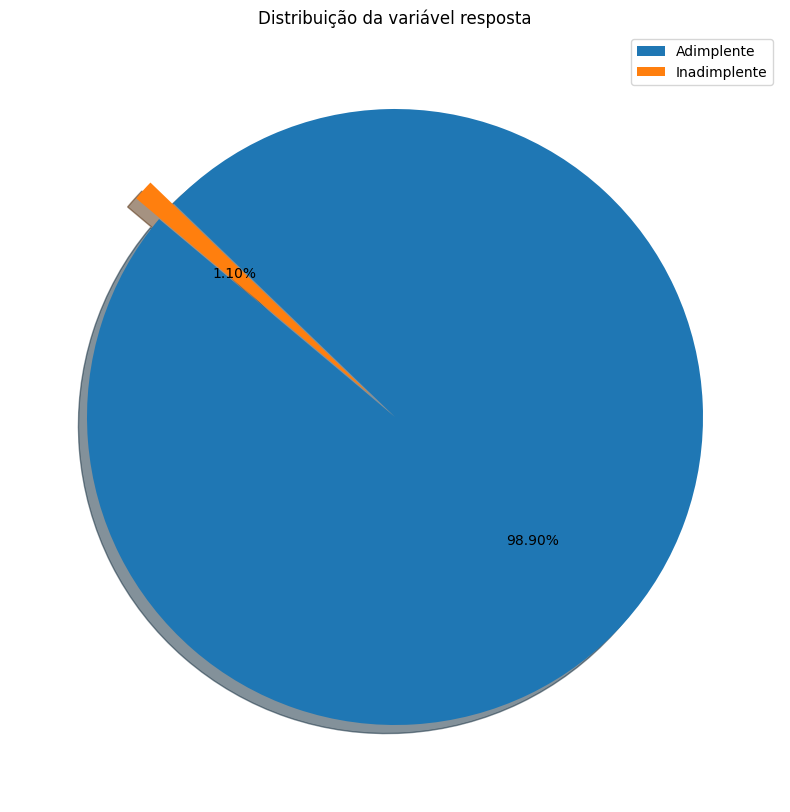

In [149]:
# Define o tamanho da figura do gr√°fico (10x10 polegadas)
plt.figure(figsize=(10,10))

# O explode destaca a segunda fatia (0.1), enquanto a primeira fatia n√£o √© destacada (0).
# Isso pode ser usado para dar mais destaque a uma das categorias.
explode = [0, 0.1]

# Cria o gr√°fico de pizza (pie chart)
# df['target'].value_counts() conta as ocorr√™ncias de cada valor na coluna 'target'
# explode define o destaque das fatias
# autopct='%1.2f%%' exibe as porcentagens das fatias no gr√°fico com 2 casas decimais
# shadow=True adiciona uma sombra ao gr√°fico para dar um efeito tridimensional
# startangle=140 define o √¢ngulo de in√≠cio do gr√°fico, em graus (140 graus gira o gr√°fico para que a primeira fatia fique na parte superior)
plt.pie(df_treino['target'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True, startangle=140)

# Adiciona uma legenda ao gr√°fico com os r√≥tulos para cada categoria (Adimplente e Inadimplente)
plt.legend(labels=['Adimplente', 'Inadimplente'])

# Define o t√≠tulo do gr√°fico
plt.title('Distribui√ß√£o da vari√°vel resposta')


In [150]:
df_treino[num_vars].describe(percentiles = [0.01,0.75, 0.99])

fraud_bool         income  name_email_similarity  prev_address_months_count  current_address_months_count   customer_age  days_since_request   zip_count_4w    velocity_6h   velocity_24h  ...  phone_mobile_valid  bank_months_count  has_other_cards  proposed_credit_limit  foreign_request  session_length_in_minutes  keep_alive_session  device_distinct_emails_8w  device_fraud_count          month
count  700000.000000  700000.000000          700000.000000              200993.000000                 697025.000000  700000.000000        7.000000e+05  700000.000000  700000.000000  700000.000000  ...       700000.000000      700000.000000    700000.000000          700000.000000    700000.000000              698577.000000       700000.000000              699752.000000            700000.0  700000.000000
mean        0.011029       0.562649               0.493809                  60.739175                     86.994999      33.695000        1.027806e+00    1572.573460    5661.894626    4769.479613  ...            0.889449          10.848057         0.222641             516.048929         0.025263                   7.571731            0.577209                   1.019151                 0.0       3.289077
std         0.104436       0.290484               0.289046                  63.553945                     88.445867      12.025118        5.395607e+00    1004.729825    3009.771699    1479.758813  ...            0.313576          12.121328         0.416020             487.852571         0.156923                   8.055398            0.494003                   0.176765                 0.0       2.208719
min         0.000000       0.100000               0.000001                   6.000000                      0.000000      10.000000        4.036860e-09       1.000000    -170.603072    1320.283991  ...            0.000000          -1.000000         0.000000             190.000000         0.000000                   0.000872            0.000000                   0.000000                 0.0       0.000000
1%          0.000000       0.100000               0.021748                   9.000000                      1.000000      10.000000        2.789648e-04     247.000000     692.876754    2020.814953  ...            0.000000          -1.000000         0.000000             200.000000         0.000000                   0.709655            0.000000                   1.000000                 0.0       0.000000
50%         0.000000       0.600000               0.492320                  34.000000                     53.000000      30.000000        1.516199e-02    1263.000000    5313.061021    4750.569699  ...            1.000000           5.000000         0.000000             200.000000         0.000000                   5.122287            1.000000                   1.000000                 0.0       3.000000
75%         0.000000       0.800000               0.755491                  72.000000                    130.000000      40.000000        2.632769e-02    1944.000000    7680.131782    5752.346294  ...            1.000000          25.000000         0.000000             500.000000         0.000000                   8.884242            1.000000                   1.000000                 0.0       5.000000
99%         1.000000       0.900000               0.997469                 320.000000                    370.000000      60.000000        2.201318e+01    4967.000000   13930.418801    8599.812314  ...            1.000000          31.000000         1.000000            1500.000000         1.000000                  44.772588            1.000000                   2.000000                 0.0       7.000000
max         1.000000       0.900000               0.999999                 383.000000                    428.000000      90.000000        7.845690e+01    6700.000000   16715.565404    9506.896596  ...            1.000000          32.000000         1.000000            2100.000000         1.000000                  83.213536            1.000000             

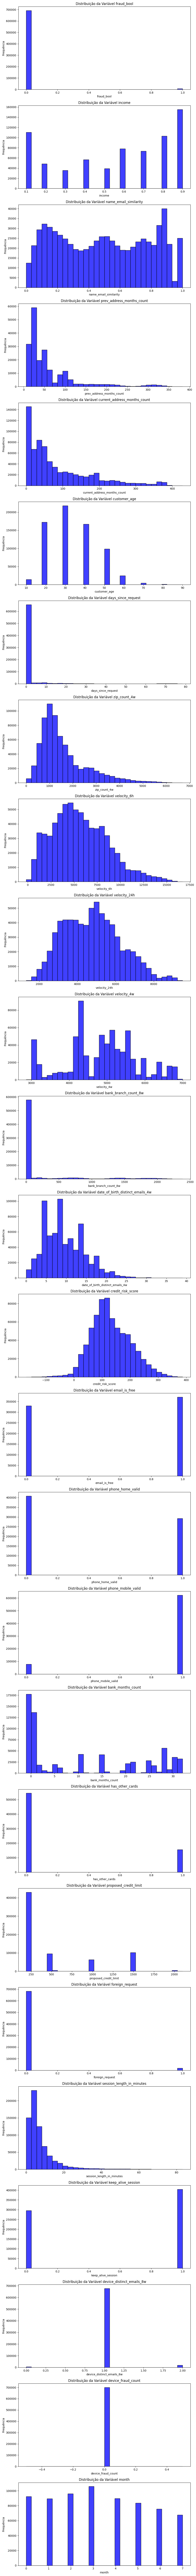

In [151]:
# Criar uma figura com m√∫ltiplos histogramas
# Utiliza o m√©todo subplots do matplotlib para criar uma figura com m√∫ltiplos subgr√°ficos (axes)
# nrows= len(num_vars) cria uma linha de gr√°ficos, uma para cada vari√°vel num√©rica
# ncols=1 define que teremos uma coluna de subgr√°ficos
# figsize=(10, 5 * len(num_vars)) define o tamanho da figura com base no n√∫mero de vari√°veis num√©ricas, aumentando a altura conforme necess√°rio
fig, axes = plt.subplots(nrows=len(num_vars), ncols=1, figsize=(10, 5 * len(num_vars)))

# Criar um histograma para cada vari√°vel num√©rica
# O loop for percorre todas as vari√°veis num√©ricas
for i, var in enumerate(num_vars):
    # Utiliza o Seaborn para criar um histograma para cada vari√°vel, passando o eixo espec√≠fico (ax=axes[i])
    # color="blue" define a cor do histograma
    # bins=30 define o n√∫mero de barras (bins) no histograma
    sns.histplot(df_treino[var], ax=axes[i], color="blue", bins=30)

    # Define o t√≠tulo do gr√°fico para cada vari√°vel
    axes[i].set_title(f'Distribui√ß√£o da Vari√°vel {var}')

    # Define o r√≥tulo no eixo x (nome da vari√°vel)
    axes[i].set_xlabel(var)

    # Define o r√≥tulo no eixo y (Frequ√™ncia)
    axes[i].set_ylabel('Frequ√™ncia')

# Ajusta o layout dos subgr√°ficos para que fiquem bem organizados e sem sobreposi√ß√£o
plt.tight_layout()

# Exibe os gr√°ficos gerados
plt.show()


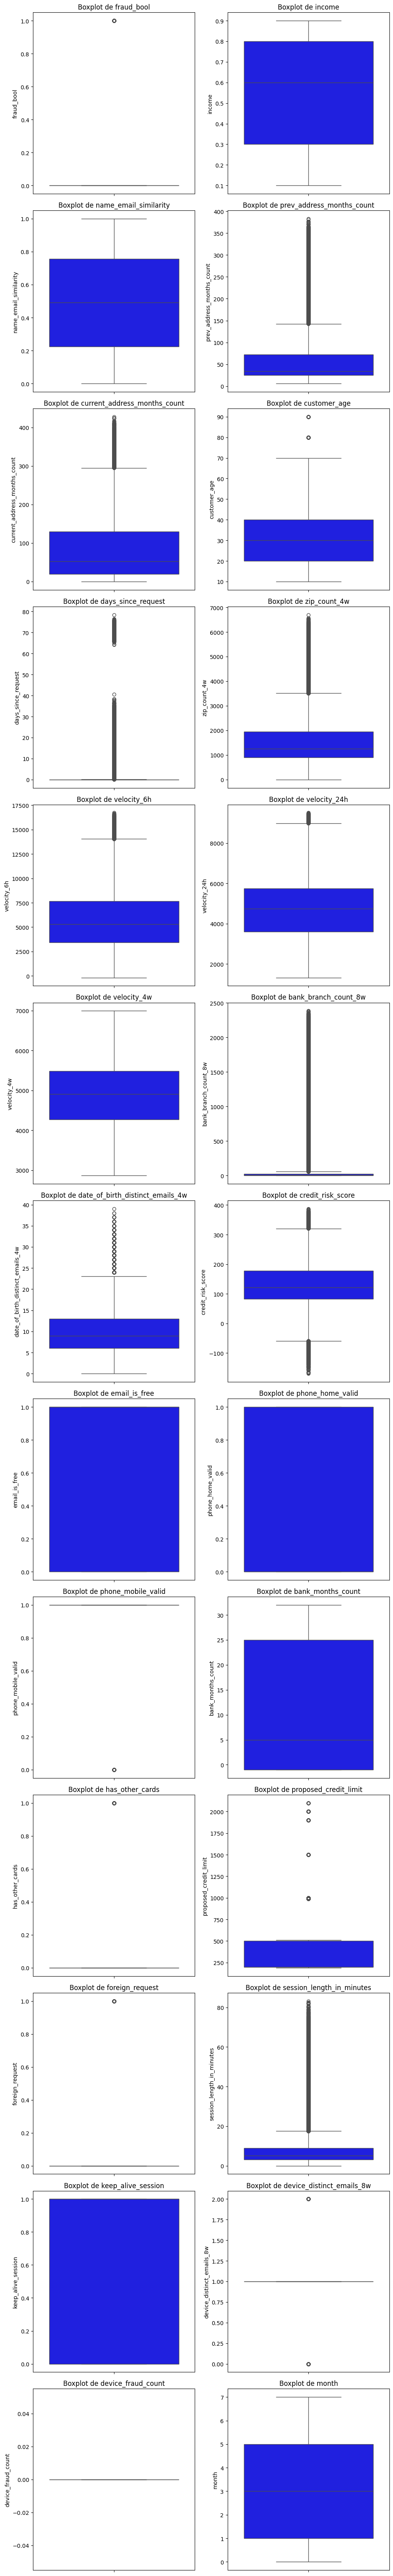

In [152]:
# Calcular o n√∫mero de linhas necess√°rias para exibir 2 boxplots por linha
ncols = 2  # n√∫mero de colunas (2 boxplots por linha)
nrows = math.ceil(len(num_vars) / ncols)  # n√∫mero de linhas necess√°rias

# Criar uma figura com m√∫ltiplos boxplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))

# Fazer o loop para criar um boxplot para cada vari√°vel num√©rica
for i, var in enumerate(num_vars):
    row = i // ncols  # Calcula a linha onde o boxplot ser√° colocado
    col = i % ncols   # Calcula a coluna onde o boxplot ser√° colocado
    sns.boxplot(y=df_treino[var], ax=axes[row, col], color="blue")  # Cria o boxplot
    axes[row, col].set_title(f'Boxplot de {var}')  # Define o t√≠tulo para cada boxplot
    axes[row, col].set_ylabel(var)  # Define o r√≥tulo do eixo y (nome da vari√°vel)

# Ajusta o layout dos gr√°ficos para que fiquem bem organizados
plt.tight_layout()

# Exibe os gr√°ficos gerados
plt.show()


Text(0.5, 1.0, 'Correla√ß√£o entre os atributos')

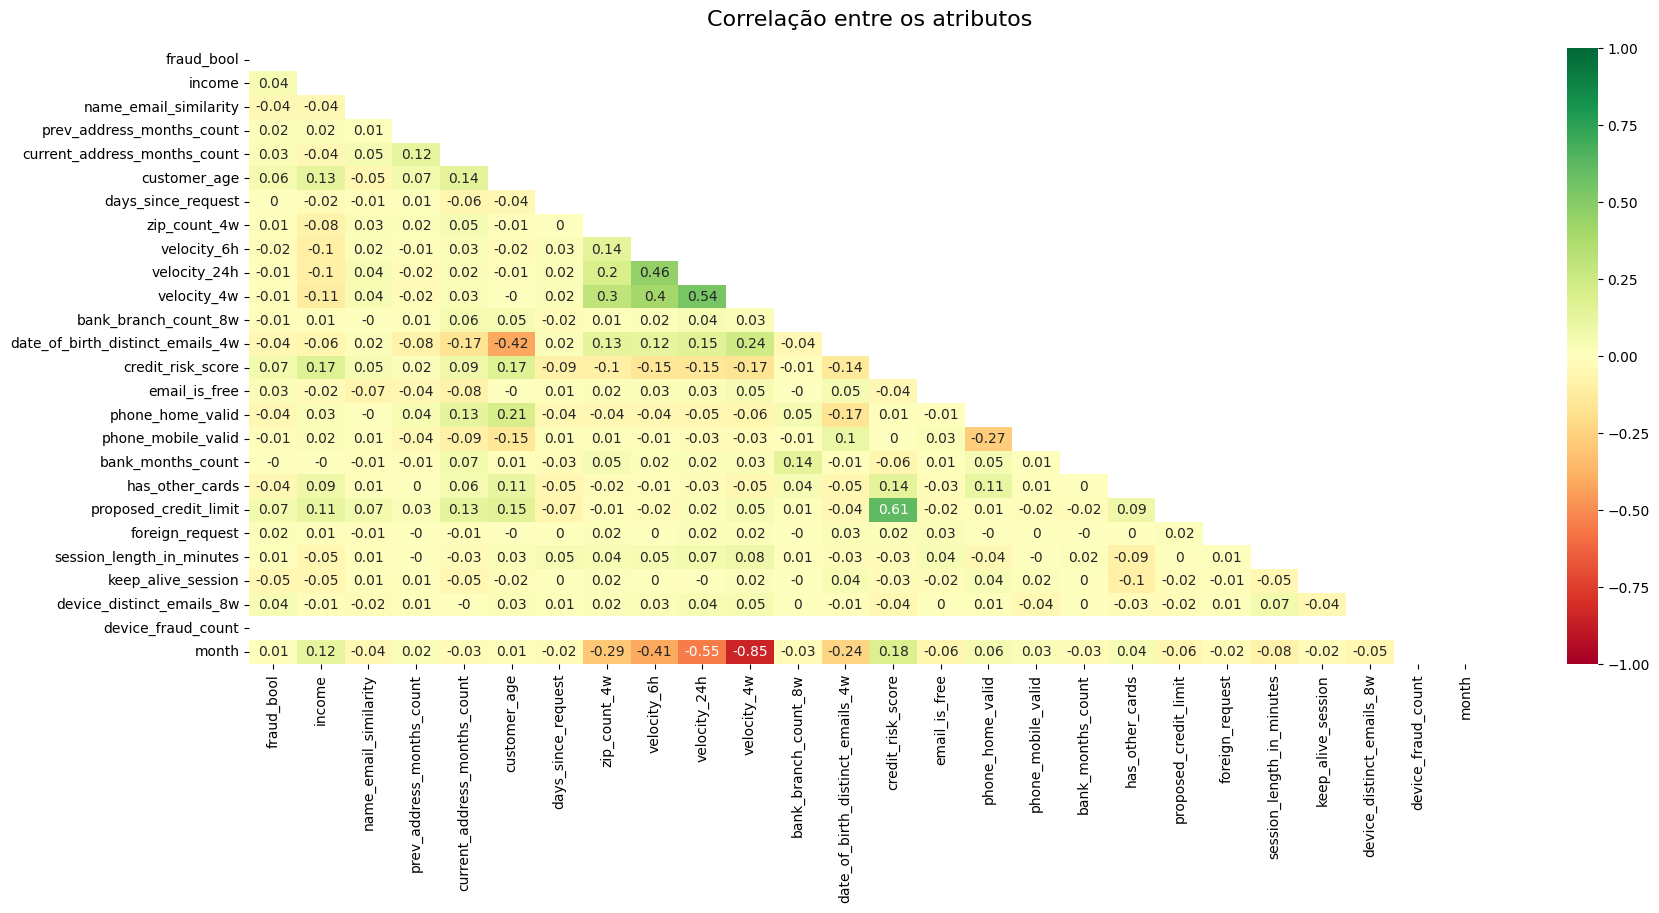

In [153]:
# Criando uma matriz de correla√ß√£o com um gr√°fico de calor (heatmap)
plt.figure(figsize=(20, 8))  # Define o tamanho da figura do gr√°fico de calor

# Definindo uma m√°scara para ocultar a parte superior da matriz de correla√ß√£o
# np.triu cria uma matriz triangular superior com 1s acima da diagonal e 0s na diagonal e abaixo
mask = np.triu(np.ones_like(df_treino[num_vars].corr(method='pearson').round(2), dtype=bool))

# Gerando o gr√°fico de calor (heatmap)
# df[num_vars].corr(method='pearson') calcula a matriz de correla√ß√£o de Pearson entre as vari√°veis num√©ricas
# round(2) arredonda os valores da correla√ß√£o para duas casas decimais
# O par√¢metro mask √© utilizado para ocultar a parte superior da matriz, deixando vis√≠vel apenas a parte inferior (para evitar redund√¢ncia)
# vmin e vmax definem os valores m√≠nimo e m√°ximo da escala de cores, respectivamente -1 e 1
# annot=True adiciona os valores num√©ricos de correla√ß√£o em cada c√©lula
# cmap="RdYlGn" define o mapa de cores, variando de vermelho para verde (indicando correla√ß√£o negativa e positiva, respectivamente)
# square=False faz com que o gr√°fico n√£o seja quadrado
# center=0 centraliza o gr√°fico de calor em torno de 0, destacando correla√ß√µes negativas e positivas
heatmap = sns.heatmap(df_treino[num_vars].corr(method='pearson').round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlGn", square=False, center=0)

# Adicionando t√≠tulo ao gr√°fico
heatmap.set_title('Correla√ß√£o entre os atributos', fontdict={'fontsize': 16}, pad=16)



In [155]:
df.head(3)

fraud_bool  income  name_email_similarity  prev_address_months_count  current_address_months_count  customer_age  days_since_request payment_type  zip_count_4w   velocity_6h  ...  foreign_request    source  session_length_in_minutes  device_os keep_alive_session  device_distinct_emails_8w  device_fraud_count month  month_named  target
2           0     0.8               0.996707                        9.0                          14.0            40            0.012316           AB          1095   4471.472149  ...                0  INTERNET                  22.730559    windows                  0                        1.0                   0     0      Janeiro       0
3           0     0.6               0.475100                       11.0                          14.0            30            0.006991           AB          3483  14431.993621  ...                0  INTERNET                  15.215816      linux                  1                        1.0                   0     0      Janeiro       0
6           0     0.2               0.773085                       22.0                           4.0            40            0.006919           AB          1998  11723.993606  ...                0  INTERNET                  28.199923        x11                  1                        1.0                   0     0      Janeiro       0

[3 rows x 33 columns]

In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

üìä Classification Report:
              precision    recall  f1-score   support

           0     0.9943    0.9462    0.9697    197794
           1     0.0964    0.5150    0.1624      2206

    accuracy                         0.9414    200000
   macro avg     0.5454    0.7306    0.5660    200000
weighted avg     0.9844    0.9414    0.9607    200000



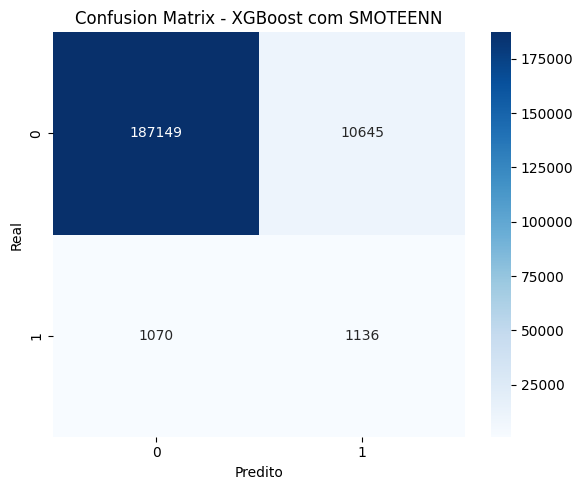

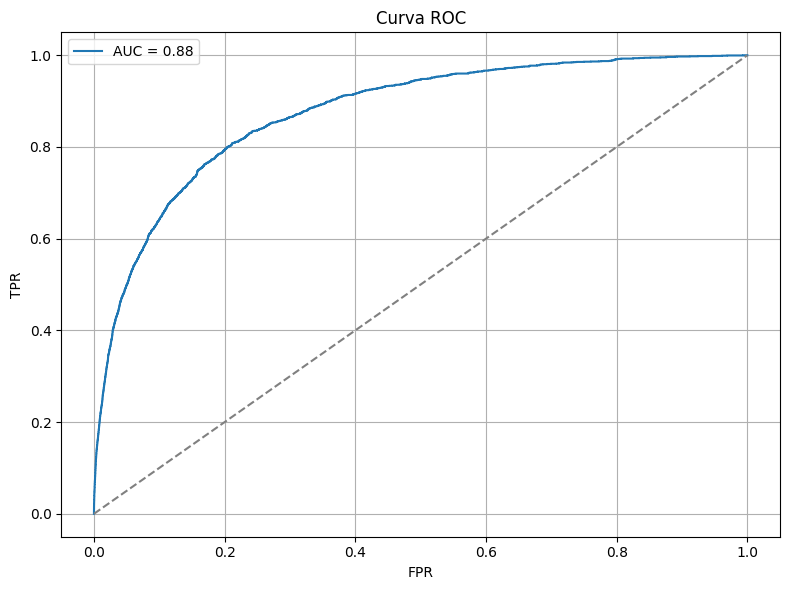

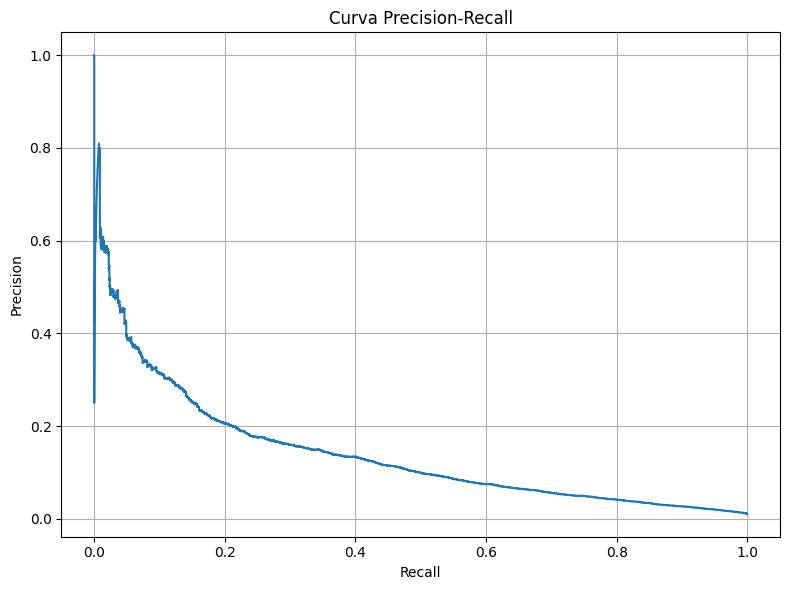

In [158]:
# ‚öôÔ∏è Fun√ß√µes utilit√°rias
def carregar_dados(caminho_csv):
    return pd.read_csv(data_url)

def codificar_dados(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df

def tratar_nulos(X):
    imputer = SimpleImputer(strategy='median')
    return pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

def preparar_dados(df):
    df = df.dropna(subset=['fraud_bool'])
    X = df.drop(columns=["fraud_bool"])
    y = df["fraud_bool"]
    X = codificar_dados(X)
    X = tratar_nulos(X)
    return train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

def balancear_amostras(X_train, y_train):
    X_sampled, _, y_sampled, _ = train_test_split(
        X_train, y_train, stratify=y_train, test_size=0.8, random_state=42
    )
    smote_enn = SMOTEENN(random_state=42)
    return smote_enn.fit_resample(X_sampled, y_sampled)

def treinar_modelo(X, y):
    model = XGBClassifier(
        scale_pos_weight=10,
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    model.fit(X, y)
    return model

def avaliar_modelo(model, X_test, y_test, threshold=0.4):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba > threshold).astype(int)

    print("üìä Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - XGBoost com SMOTEENN")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Curva ROC")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.grid()
    plt.tight_layout()
    plt.show()

# üöÄ Execu√ß√£o no Colab
caminho_csv = "Base (1).csv"  # Substitua com o nome correto do seu upload no Colab
df = carregar_dados(data_url)
X_train, X_test, y_train, y_test = preparar_dados(df)
X_bal, y_bal = balancear_amostras(X_train, y_train)
modelo = treinar_modelo(X_bal, y_bal)
avaliar_modelo(modelo, X_test, y_test)
